In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("online_course_engagement_data.csv")
df

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [4]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [5]:
df.duplicated().sum()
df.drop_duplicates()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [6]:
le=LabelEncoder()
df["CourseCategory"]=le.fit_transform(df["CourseCategory"])

In [7]:
num_var=[features for features in df.columns if df[features].dtype!="O"]
cat_var=[features for features in df.columns if df[features].dtype=="O"]
print(f"Numerical Variable : {num_var}\nCategorical Variable : {cat_var}")

Numerical Variable : ['UserID', 'CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType', 'CourseCompletion']
Categorical Variable : []


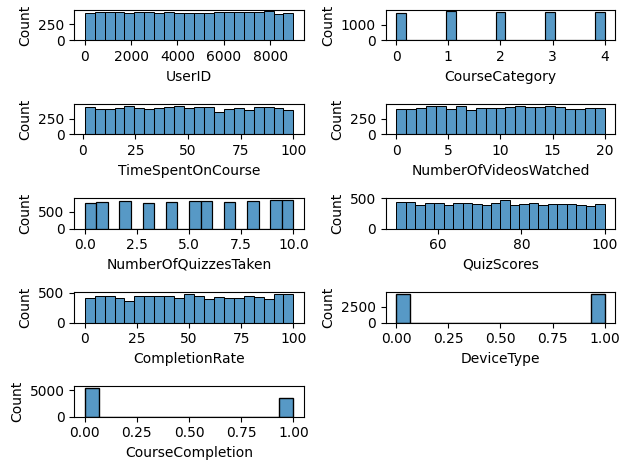

In [8]:
for i in range(len(num_var)):
    plt.subplot(5,2,i+1)
    sns.histplot(df[num_var[i]])
    plt.tight_layout()

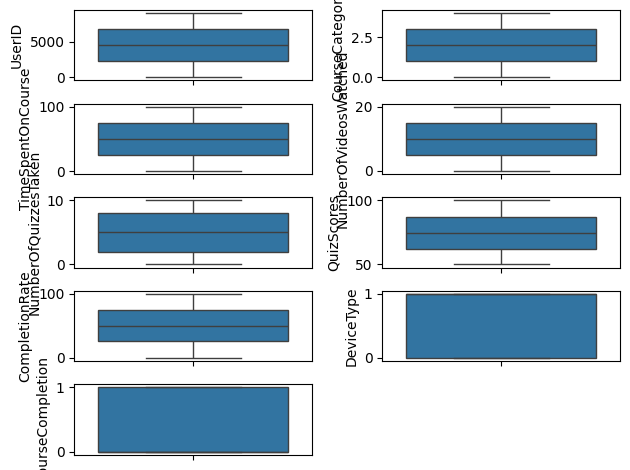

In [9]:
for i in range(len(num_var)):
    plt.subplot(5,2,i+1)
    sns.boxplot(df[num_var[i]])
    plt.tight_layout()